In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', '34dc044c5d34433ab43e7b71c4630efe')

In [3]:
results = search_images_bing(key, 'tiger snake')
ims = results.attrgot('content_url')
len(ims)

150

In [4]:
ims


(#150) ['https://biomedicalsciences.unimelb.edu.au/__data/assets/image/0017/2342600/Notechis-scutatus_1_1500C.png','http://lakeshub.com/wp-content/uploads/2011/09/tiger4.jpg','https://biomedicalsciences.unimelb.edu.au/__data/assets/image/0005/2342606/Notechis-scutatus_3_1500C.png','https://www.uq.edu.au/news/filething/get/131974/tiger%20snake%202.jpg','https://d.newsweek.com/en/full/1532976/file-photo-tiger-snake.jpg','https://i.ytimg.com/vi/NAxXrvE09os/maxresdefault.jpg','http://www.quantumbooks.com/wp-content/uploads/2014/08/Notechis-scutatus.jpg','https://dancingastronaut.com/wp-content/uploads/2019/01/venomous_mainland_tiger_snake_h.jpg','http://thezoozoom.com/wp-content/uploads/2016/01/Tiger-Snake.jpg','http://4.bp.blogspot.com/-WF6Jn1aPrvc/UV8UiZN0odI/AAAAAAAABRU/1vG3Jz-skAc/s1600/Tiger_Snake_4.jpg'...]

In [5]:
dest = 'images/one_snake.jpg'
download_url(ims[0],dest)

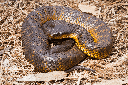

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
snake_types = 'tiger', 'copper head', 'brown' 
path = Path('snakes')

In [12]:
if not path.exists():
    path.mkdir()
for o in snake_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, f'{o} snake')
    download_images(dest, urls = results.attrgot('content_url'))

In [13]:
fns = get_image_files(path)
fns

(#446) [Path('snakes/tiger/00000000.png'),Path('snakes/tiger/00000004.jpg'),Path('snakes/tiger/00000002.png'),Path('snakes/tiger/00000005.jpg'),Path('snakes/tiger/00000007.jpg'),Path('snakes/tiger/00000001.jpg'),Path('snakes/tiger/00000008.jpg'),Path('snakes/tiger/00000011.jpg'),Path('snakes/tiger/00000009.jpg'),Path('snakes/tiger/00000013.jpg')...]

In [15]:
failed = verify_images(fns)
failed

(#6) [Path('snakes/tiger/00000045.jpg'),Path('snakes/copper head/00000020.JPG'),Path('snakes/copper head/00000045.jpg'),Path('snakes/brown/00000050.jpg'),Path('snakes/brown/00000084.jpg'),Path('snakes/brown/00000122.jpg')]

In [16]:
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

In [18]:
# Creating the dataloaders

snakes = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [20]:
dls = snakes.dataloaders(path)

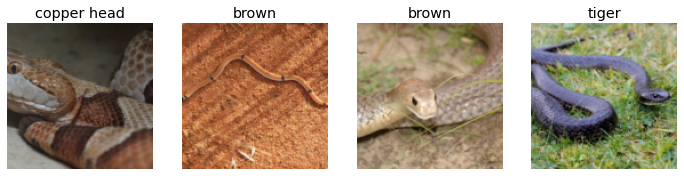

In [21]:
dls.valid.show_batch(max_n=4, nrows=1)

* Training the model

In [22]:
snakes = snakes.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms())
dls = snakes.dataloaders(path)

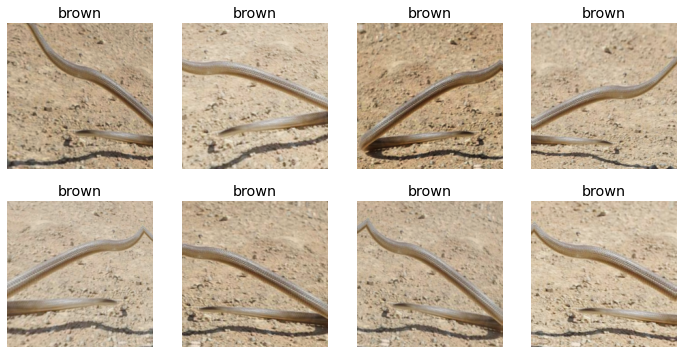

In [23]:
dls.train.show_batch(max_n=8, nrows = 2, unique = True)

In [24]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.531204,0.623651,0.284091,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.789090,0.421395,0.181818,00:07
1,0.643394,0.403148,0.181818,00:06
2,0.519588,0.390424,0.170455,00:07
3,0.437304,0.386736,0.159091,00:06


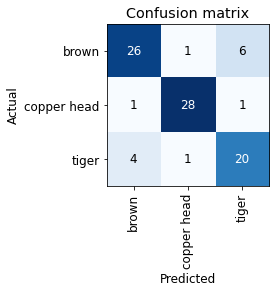

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

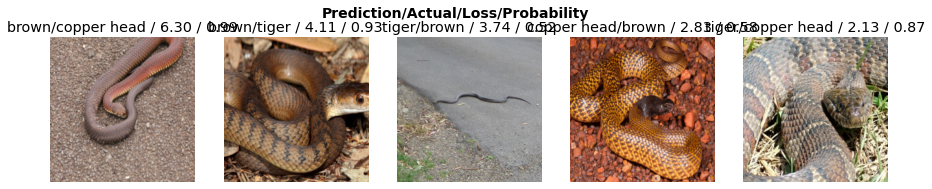

In [26]:
interp.plot_top_losses(5,nrows = 1)

In [27]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
learn.export()

In [29]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]